# Visualize average self-attention in the last layer

## Download fine-tuned models and libraries 

Choose only one model below.

### Option 1: Fine-tuned SciBERT on articles clasification

In [2]:
!gdown --id 1uKFfoh95K7lRXEwdMt7F32ivohwAENzT

Downloading...
From: https://drive.google.com/uc?id=1uKFfoh95K7lRXEwdMt7F32ivohwAENzT
To: /content/scibert10v2_scigraph0.pt
440MB [00:04, 99.2MB/s]


### Option 2: Fine-tuned BERT on articles clasification

In [ ]:
!gdown --id 19pNPMyguDUPOlza-B4J-NqOOdU-ZqGwl

### Option 3: Fine-tuned BioBERT 1.1 on articles clasification

In [ ]:
!gdown --id 1waZOhC4LADr6rQx0cf3LRA4UZSj6u2uu

Download library used to fine-tune the LM on mutilabel classification

In [3]:
!gdown --id 1LpufGkbVYTGxgAHr2TyqQimqVRte420U

Downloading...
From: https://drive.google.com/uc?id=1LpufGkbVYTGxgAHr2TyqQimqVRte420U
To: /content/BertModeling.py
100% 14.4k/14.4k [00:00<00:00, 22.6MB/s]


In [4]:
!ls

BertModeling.py  sample_data  scibert10v2_scigraph0.pt


## Install and import required libraries

In [5]:
!pip install 'transformers==2.8.0'

     |████████████████████████████████| 573kB 5.7MB/s 
     |████████████████████████████████| 133kB 24.0MB/s 
     |████████████████████████████████| 890kB 29.6MB/s 
     |████████████████████████████████| 3.7MB 37.2MB/s 
     |████████████████████████████████| 1.1MB 43.5MB/s 
     |████████████████████████████████| 6.7MB 38.4MB/s 
     |████████████████████████████████| 71kB 9.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=0a7c6e330e34c74a1190a108fb2e815b3d8aae1a1aa741366b8fa4d16f636f52
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses
ERROR: botocore 1.19.7 has requirement urllib3<1.26,>=1.25.4; python_version != "3.4", but you'll have urllib3 1.24.3 which is incompatible.


In [6]:
import sys

from BertModeling import BertForMultiLabelSequenceClassification
from BertModeling import (BertForMultiLabelSequenceClassification, BioBertForMultiLabelSequenceClassification, 
                         BioBertForMultiLabelSequenceClassification2, XLNetForMultiLabelSequenceClassification,
                          GPT2MultiLabelClassification)
from transformers import (WEIGHTS_NAME, BertConfig, BertForSequenceClassification, BertTokenizer, AutoTokenizer, AutoModelWithLMHead,AutoConfig,
                                  XLMConfig, XLMForSequenceClassification, XLMTokenizer, 
                                  XLNetConfig, XLNetForSequenceClassification, XLNetTokenizer,
                                  RobertaConfig, RobertaForSequenceClassification, RobertaTokenizer)
#from bertviz.transformers_neuron_view import BertModel, BertTokenizer, BertForPreTraining, BertForSequenceClassification
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from transformers import BertTokenizer
import torch
from torch.utils.data import (DataLoader, RandomSampler, SequentialSampler,
                              TensorDataset)

## Load the fine-tuned language models

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

Choose only one of the models by running the corresponding cell

#### Option 1: Fine-tuned SciBERT

In [15]:
#scibert 
pretrainedModelpath = 'allenai/scibert_scivocab_uncased' 
modelpath = './scibert10v2_scigraph0.pt' #fine-tuned model

config = AutoConfig.from_pretrained('allenai/scibert_scivocab_uncased', output_hidden_states=True, output_attentions=True, num_labels=22)#
model = BertForMultiLabelSequenceClassification(config=config)
model.load_state_dict(torch.load(modelpath))

bert_tokenizer = BertTokenizer.from_pretrained(pretrainedModelpath, do_lower_case=True, return_token_type_ids=True)
model.eval()

BertForMultiLabelSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(31090, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-1

### Option 2: Fine-tuned BERT

In [ ]:
#Bert 
modelpath = "./bert_scigraph0.pt" 

config = BertConfig(output_hidden_states=True, output_attentions=True, num_labels=22)
model = BertForMultiLabelSequenceClassification(config=config)
model.load_state_dict(torch.load(modelpath))

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True, return_token_type_ids=True)
model.eval()

### Option 3: Fine-tuned BioBERT

In [ ]:
#BioBert 
pretrainedModelpath = 'monologg/biobert_v1.1_pubmed'
modelpath = "./biobert11v2_scigraph0.pt" #fine-tuned model

config = AutoConfig.from_pretrained(pretrainedModelpath+'config.json', output_hidden_states=True, output_attentions=True, num_labels=22)#
model = BioBertForMultiLabelSequenceClassification2(config=config)
model.load_state_dict(torch.load(modelpath))
model = model.bert

bert_tokenizer = BertTokenizer.from_pretrained(pretrainedModelpath, do_lower_case=True, return_token_type_ids=True)
model.eval()

## Visualize attention last layer

### Tokenize a sentence

In [16]:
#sent="A universal long-term flu vaccine may not prevent severe epidemics"
sent ="BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"
tokenized_sentence = bert_tokenizer.encode(sent, add_special_tokens=True)
tokens = bert_tokenizer.tokenize(sent) #No special tokens

### Process the sentence with the fine-tuned model 

In [17]:
input_ids = torch.tensor(tokenized_sentence).unsqueeze(0)
outputs = model(input_ids)

### Inspect the model attention 

torch.Size([12, 14, 14])
Data Max:  0.23208278
Data Min:  0.0003950287
Data Mean:  0.061727658


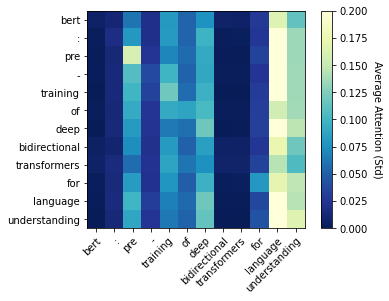

In [18]:
fig, ax = plt.subplots()
fig.patch.set_facecolor('xkcd:white')

# for each layer, out has the attention heads
for i, out in enumerate(outputs[-1]):    
  # focus only on the last layer
  if i != 11:
    continue 
  
  # Get attention matrices (one per head in the last layer)
  att = out[0]
  print(att.shape)
  matrix = torch.zeros(att[0].shape)   
  for a in att:
    matrix = matrix + a

  # Average the attention of the 12 heads in the last layer
  matrix = matrix/12  

  #remove first and last row and column CLS and sept
  matrix = matrix.detach().numpy()
  matrix = np.delete(matrix, 0, axis=0)
  matrix = np.delete(matrix, -1, axis=0)
  matrix = np.delete(matrix, 0, axis=1)
  matrix = np.delete(matrix, -1, axis=1)

  print("Data Max: ",matrix.max())
  print("Data Min: ",matrix.min())
  print("Data Mean: ",matrix.mean())

  
  im = ax.imshow(matrix, cmap="YlGnBu_r", vmin=0,vmax=0.2)
  #im = ax.imshow(matrix, cmap="YlGnBu_r", vmin=0,vmax=matrix.max())
  # Create colorbar
  cbar_kw={}
  cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
  cbar.ax.set_ylabel("Average Attention (Std)", rotation=-90, va="bottom")
  
  ax.set_xticks(np.arange(len(tokens)))
  ax.set_yticks(np.arange(len(tokens)))
  # ... and label them with the respective list entries
  ax.set_xticklabels(tokens)
  ax.set_yticklabels(tokens)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
  #fig.tight_layout()  
  copymatrix = matrix
  matrix = torch.zeros(att[0].shape)
  k+=1
plt.show()